In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris, load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from VotingClassifier import VotingClassifier
from sklearn.ensemble import VotingClassifier as SklearnVotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
datasets = {
    'diabetes': load_diabetes(),
    'Iris': load_iris(),
    'Wine': load_wine()
}

# Define base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier(max_depth=1)),
    ('lr', LogisticRegression()),
    ('svc', SVC(kernel='linear', probability=True))
]

In [3]:
# Initialize the voting classifier
voting = VotingClassifier(base_classifiers)

# Initialize scikit-learn's voting classifier
sklearn_voting = SklearnVotingClassifier(estimators=base_classifiers, voting='soft')

results = {}
for name, data in datasets.items():
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    voting.fit(X_train, y_train)
    sklearn_voting.fit(X_train, y_train)

    voting_pred = voting.predict(X_test)
    sklearn_voting_pred = sklearn_voting.predict(X_test)

    voting_score = accuracy_score(y_test, voting_pred)
    sklearn_voting_score = accuracy_score(y_test, sklearn_voting_pred)

    results[name] = {
        'Voting': voting_score,
        'Scikit-learn Voting': sklearn_voting_score
    }


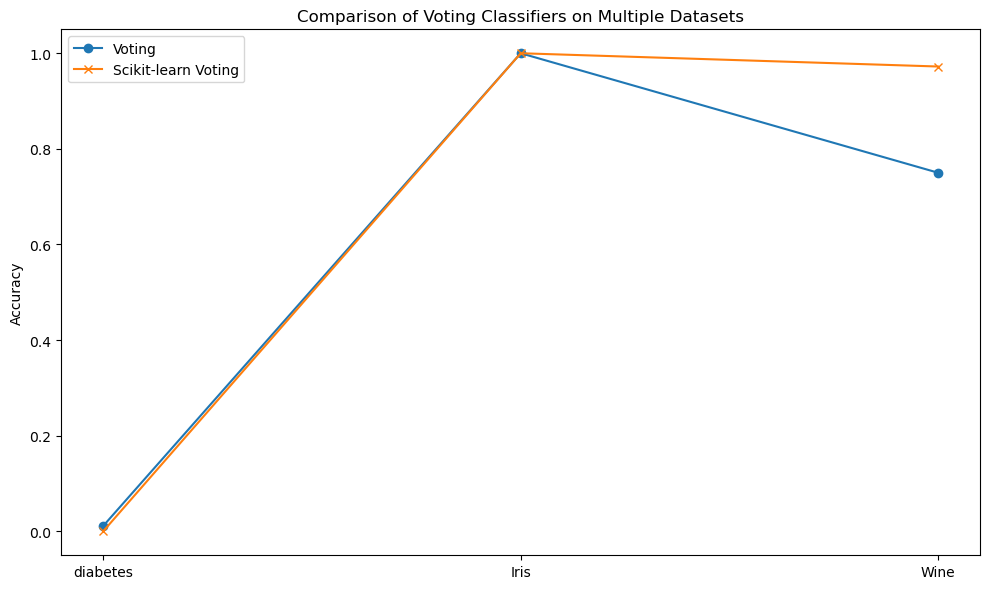

In [4]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
labels = list(results.keys())
scores = [results[name]['Voting'] for name in labels]
sklearn_scores = [results[name]['Scikit-learn Voting'] for name in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

ax.plot(x, scores, label='Voting', marker='o')
ax.plot(x, sklearn_scores, label='Scikit-learn Voting', marker='x')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Voting Classifiers on Multiple Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()
